In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from datetime import timedelta
from dotenv import find_dotenv
from os.path import dirname
from os.path import exists
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.load import load_train_df
from src.load import load_test_df
from src.transform import get_week_by_dept_df
from src.transform import unpivot_week_by_dept_df
from src.features import make_id_column

# Root directory of repo
project_dir = dirname(find_dotenv())

# Use custom matplotlib style
plt.style.use(join(project_dir, 'big-darkgrid.mplstyle'))

/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app


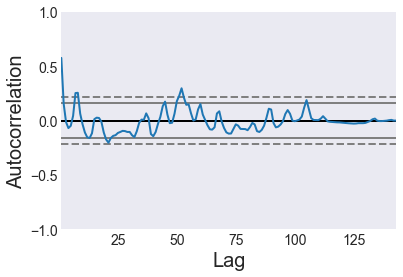

In [4]:
week_by_dept = get_week_by_dept_df()
pd.tools.plotting.autocorrelation_plot(week_by_dept.iloc[:, 0])
plt.show()

<Figure size 432x288 with 0 Axes>

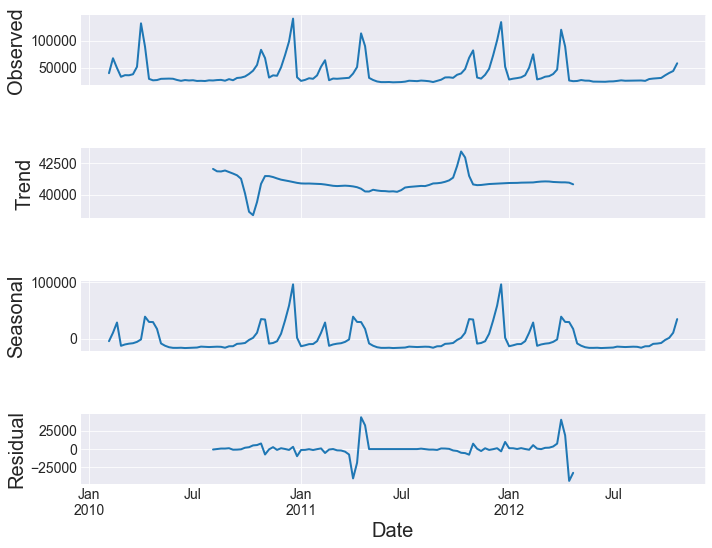

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
one_dept = week_by_dept.iloc[:, 0]
decomposition = seasonal_decompose(one_dept, freq=52)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(10, 8)
plt.tight_layout()

In [50]:
# from http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean()
    rolstd = timeseries.rolling(window=52).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

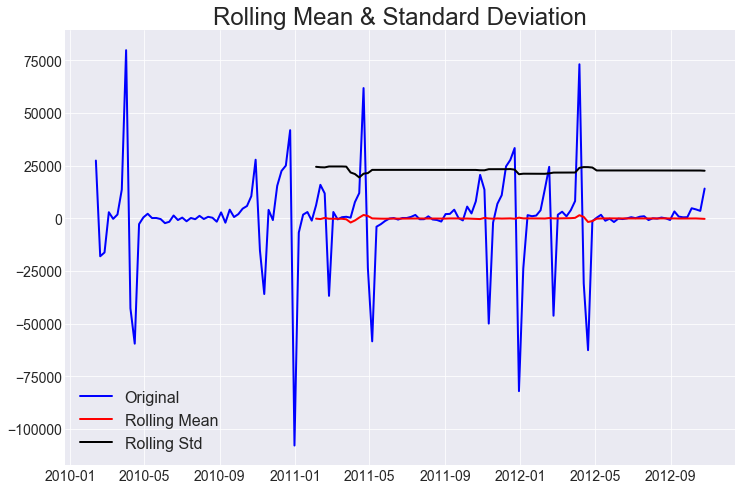

Results of Dickey-Fuller Test:
Test Statistic                -9.935376e+00
p-value                        2.752621e-17
#Lags Used                     5.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


In [53]:
first_difference = one_dept - one_dept.shift(1)
test_stationarity(first_difference.dropna())

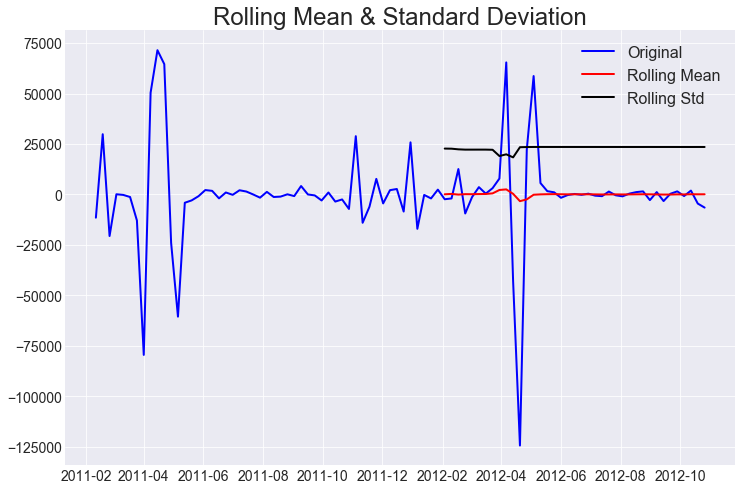

Results of Dickey-Fuller Test:
Test Statistic                -7.408643e+00
p-value                        7.231821e-11
#Lags Used                     5.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


In [54]:
seasonal_first_difference = first_difference - first_difference.shift(52)
test_stationarity(seasonal_first_difference.dropna())

In [55]:
result = seasonal_decompose(week_by_dept, freq=52)

In [57]:
result.seasonal.head()

Store_Dept,10_1,10_10,10_11,10_12,10_13,10_14,10_16,10_17,10_18,10_19,...,9_9,9_90,9_91,9_92,9_93,9_94,9_95,9_96,9_97,9_98
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,-4638.774405,-5282.793141,-1045.830848,-665.875286,2099.679303,1306.153390,-4653.014951,1858.617990,-10962.490267,-138.857457,...,-4394.082526,-43.306805,-287.969332,65.049265,-0.161657,-216.406235,-2978.636359,86.786255,3.306741,-4.727764
2010-02-12,10350.377759,1122.686138,-2859.289406,360.722791,3423.050553,4832.977910,-3540.186105,5588.418134,-381.812126,-85.900005,...,-5457.652574,-149.227766,-524.230293,557.162775,-0.161657,1043.236754,-4420.385926,-617.088024,3.201768,-4.552284
2010-02-19,28561.039442,4175.101186,-3678.018829,367.117743,2363.482620,3526.099448,-534.503605,3721.444865,11974.978618,-643.305485,...,-1821.945507,-136.970555,-341.674428,-1104.183043,-0.161657,3204.439871,-4584.834388,-791.206005,3.082799,-4.376803
2010-02-26,-12898.295270,3316.950705,-2220.319454,1463.648753,6370.807091,2831.826852,458.923847,5680.597317,-14533.328035,225.617303,...,-1918.769737,-29.836516,-240.778370,-1529.153043,-0.161657,1351.532299,-5352.432657,-974.690572,2.949833,-4.201322
2010-03-05,-10462.194357,2156.860561,-2504.436809,516.946589,5701.137813,5147.023967,1906.146732,3885.198615,-15000.799941,5.797351,...,-679.729786,-27.158728,-96.419380,-911.352947,-0.161657,1043.607371,-2865.399869,-942.130332,2.802871,-4.025841


In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_pred = pd.DataFrame(index=week_by_dept.index[104:])
for c in week_by_dept.columns[:2]:
    model = SARIMAX(week_by_dept[c].iloc[:104], trend='n', order=(0,1,0),
                    seasonal_order=(0,1,0,52))
    results = model.fit()
    y_pred = results.predict(start=104, end=len(week_by_dept), dynamic= True) 
    df_pred[c] = y_pred

/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


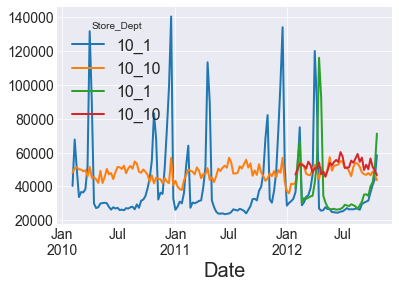

In [87]:
fig, ax = plt.subplots()
week_by_dept.iloc[:, :2].plot(ax=ax)
df_pred.plot(ax=ax)

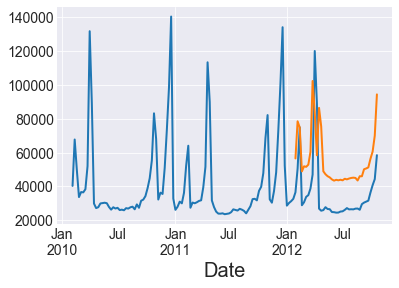

In [77]:
fig, ax = plt.subplots()
y_pred = pd.Series(y_pred, index=one_dept.index[104:])
one_dept.plot(ax=ax)
y_pred.plot(ax=ax)

In [30]:
from statsmodels.tsa.arima_model import ARIMA
X = week_by_dept.iloc[:, 0]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))
predictions = output[0]

/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple s

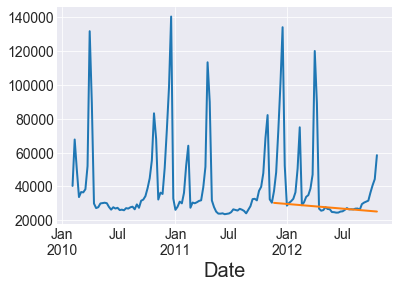

In [31]:
fig, ax = plt.subplots()
X.plot(ax=ax)
y_pred = pd.Series(predictions, index=test.index)
y_pred.plot(ax=ax)

In [21]:
from statsmodels.tsa.arima_model import ARIMA
X = week_by_dept.iloc[:, 0]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/benlindsay/miniconda/envs/altakehome/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `ar

predicted=30167.706882, expected=37228.540000
predicted=37196.792128, expected=48269.300000
predicted=48354.104842, expected=72970.200000
predicted=73311.422500, expected=100775.800000
predicted=101400.160412, expected=134217.740000
predicted=135176.973673, expected=52228.860000
predicted=52350.233939, expected=28520.490000
predicted=28403.566500, expected=30107.310000
predicted=30007.255248, expected=31180.230000
predicted=31091.675000, expected=32559.130000
predicted=32484.822136, expected=36444.000000
predicted=36407.761154, expected=50434.110000
predicted=50531.455429, expected=74930.330000
predicted=75257.853491, expected=28751.570000
predicted=28644.455327, expected=30525.880000
predicted=30436.185926, expected=33728.460000
predicted=33668.970275, expected=34745.100000
predicted=34695.393273, expected=38656.880000
predicted=38642.862341, expected=46922.970000
predicted=46982.881875, expected=120131.350000
predicted=120838.593451, expected=89291.510000
predicted=89722.024649, expe

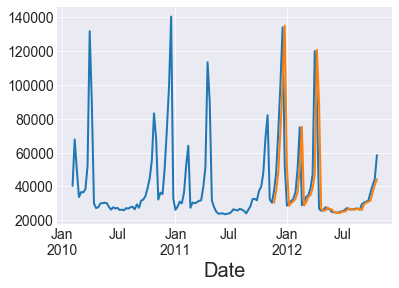

In [24]:
fig, ax = plt.subplots()
X.plot(ax=ax)
y_pred = pd.Series(predictions, index=test.index)
y_pred.plot(ax=ax)

TypeError: Empty 'DataFrame': no numeric data to plot

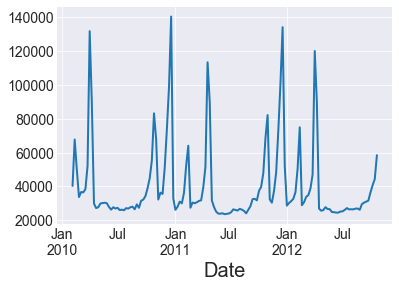

In [19]:
# df = pd.DataFrame({'pred': predictions, 'actual': history}, index=test.index)
# df.plot(ax=ax)
plt.show()